In [158]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [160]:
df = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [161]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

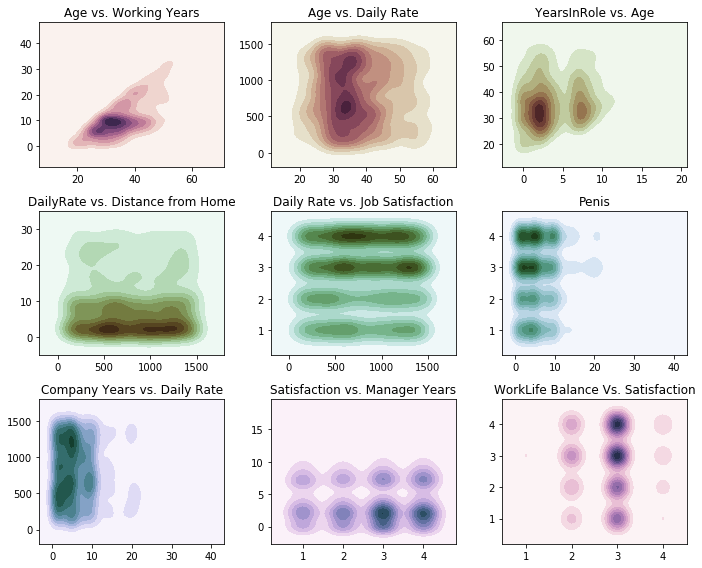

In [163]:

f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)
s = np.linspace(0, 3, 10)


cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
x=df['Age']
y=df['TotalWorkingYears']

ax1=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[0,0], cut=5)
ax1.set_title('Age vs. Working Years')
ax1.set_xlabel('')
ax1.set_ylabel('')


cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
x=df['Age']
y=df['DailyRate']
ax2=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[0,1])
ax2.set_title('Age vs. Daily Rate')
ax2.set_xlabel('')
ax2.set_ylabel('')


cmap = sns.cubehelix_palette(start=0.66, light=1, as_cmap=True)
x=df['YearsInCurrentRole']
y=df['Age']
ax3=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[0,2])
ax3.set_title('YearsInRole vs. Age')
ax3.set_xlabel('')
ax3.set_ylabel('')


cmap = sns.cubehelix_palette(start=0.99, light=1, as_cmap=True)
x=df['DailyRate']
y=df['DistanceFromHome']
ax4=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[1,0])
ax4.set_title('DailyRate vs. Distance from Home')
ax4.set_xlabel('')
ax4.set_ylabel('')


cmap = sns.cubehelix_palette(start=1.33, light=1, as_cmap=True)
x=df['DailyRate']
y=df['JobSatisfaction']
ax5=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[1,1])
ax5.set_title('Daily Rate vs. Job Satisfaction')
ax5.set_xlabel('')
ax5.set_ylabel('')


cmap = sns.cubehelix_palette(start=1.66, light=1, as_cmap=True)
x=df['YearsAtCompany']
y=df['JobSatisfaction']
ax6=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[1,2])
ax6.set_title('Penis')
ax6.set_xlabel('')
ax6.set_ylabel('')


cmap = sns.cubehelix_palette(start=1.9999, light=1, as_cmap=True)
x=df['YearsAtCompany']
y=df['DailyRate']
ax7=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[2,0])
ax7.set_title('Company Years vs. Daily Rate')
ax7.set_xlabel('')
ax7.set_ylabel('')


cmap = sns.cubehelix_palette(start=2.33, light=1, as_cmap=True)
x=df['RelationshipSatisfaction']
y=df['YearsWithCurrManager']
ax8=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[2,1])
ax8.set_title('Satisfaction vs. Manager Years')
ax8.set_xlabel('')
ax8.set_ylabel('')


cmap = sns.cubehelix_palette(start=2.666, light=1, as_cmap=True)
x=df['WorkLifeBalance']
y=df['RelationshipSatisfaction']
ax9=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[2,2])
ax9.set_title('WorkLife Balance Vs. Satisfaction')
ax9.set_xlabel('')
ax9.set_ylabel('')

f.tight_layout()

In [164]:
target_map = {'Yes':1, 'No':0}
df['Attrition_numerical']=df['Attrition'].apply(lambda x: target_map[x])

In [165]:
df.drop(['EmployeeCount', 'StandardHours' ], 1, inplace=True)

numerical=[]

for a in df.columns:
    if df[a].dtypes=='int64':
        numerical.append(a)
        

In [166]:
x = df[numerical]
y = df[numerical]

z = x.corr()

In [167]:
data=go.Heatmap(z=z, x=df[numerical].columns.values, y=df[numerical].columns.values, type='heatmap', colorscale = 'Viridis', reversescale = False)

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 900)
    
    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

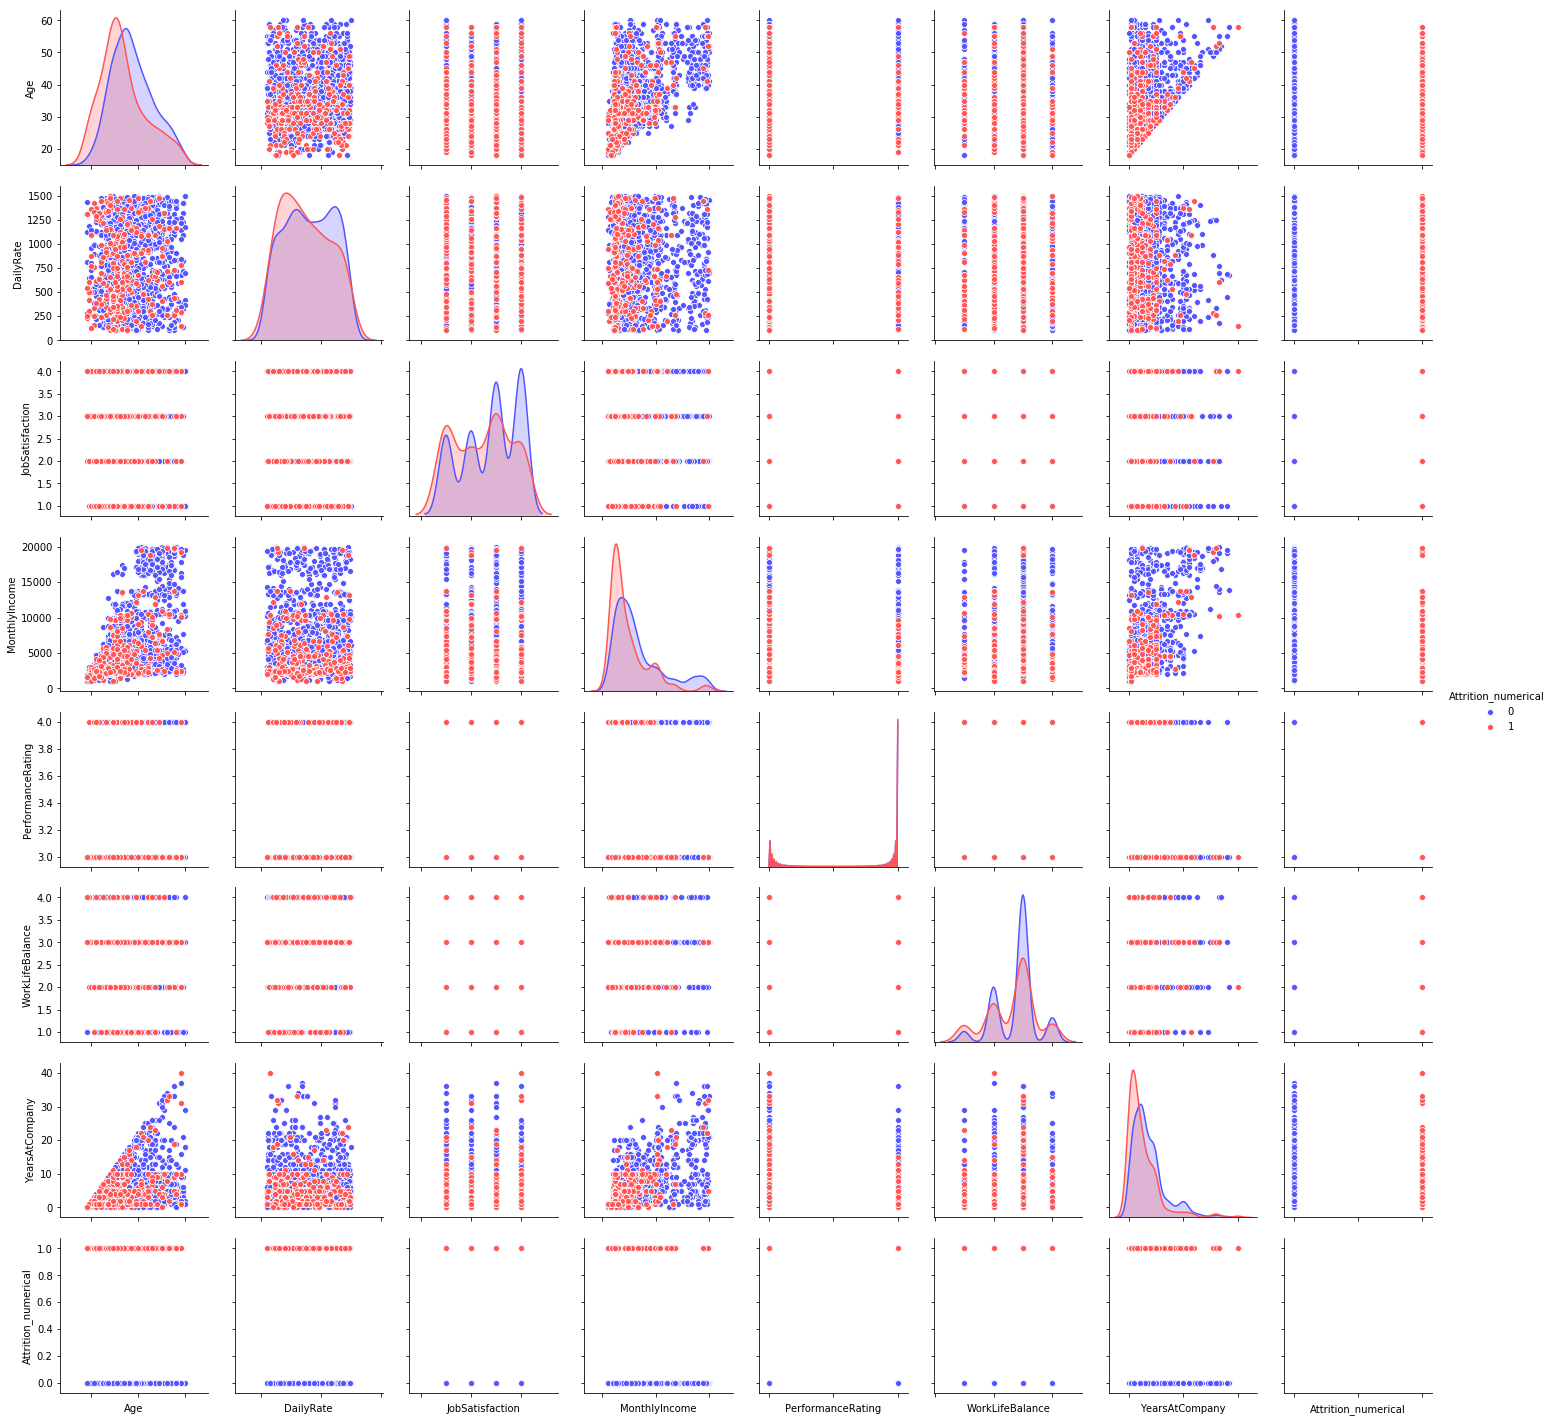

In [168]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(df[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

In [169]:
categorical=[]

for a in df.columns:
    if df[a].dtypes=='object':
        categorical.append(a)

In [170]:
df.drop('Attrition_numerical', axis=1, inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

In [172]:
numerical = df.columns.difference(categorical)

In [173]:
df[categorical].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [174]:
df_cat = df[categorical]
df_cat.drop('Attrition', axis=1, inplace=True)

In [175]:
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [176]:
df_cat = pd.get_dummies(df_cat)

In [177]:
df_num = df[numerical]

In [178]:
df_final = pd.concat([df_num, df_cat], axis=1)

In [179]:
df_final.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1


In [180]:
target_map = {'Yes':1, 'No':0}
target = df["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [181]:

data=[go.Bar(x=df['Attrition'].value_counts().index, y=df['Attrition'].value_counts().values)]
py.iplot(data)



In [182]:
df["Attrition"].value_counts().index

Index(['No', 'Yes'], dtype='object')

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

train, test, target_train, target_val = train_test_split(df_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [184]:
sampler=SMOTE(random_state=0)
smote_train, smote_target = sampler.fit_sample(train,target_train)

In [185]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}

In [186]:
rf = RandomForestClassifier(**rf_params)

In [187]:
fit = rf.fit(smote_train, smote_target)

In [188]:
rf_predictions = rf.predict(test)

In [189]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.56      0.47      0.51        49

    accuracy                           0.85       294
   macro avg       0.73      0.70      0.71       294
weighted avg       0.84      0.85      0.84       294



In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [1,2,3,4,5,6,7,8,9,10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [192]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [193]:
rf = RandomForestClassifier()

In [194]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [195]:
rf_random.fit(smote_train, smote_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [196]:
rf_random.best_params_

{'n_estimators': 1155,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [197]:
pred = rf_random.predict(test)

In [198]:
print("Accuracy score: {}".format(accuracy_score(target_val, pred)))
print("="*80)
print(classification_report(target_val, pred))

Accuracy score: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       245
           1       0.71      0.31      0.43        49

    accuracy                           0.86       294
   macro avg       0.79      0.64      0.68       294
weighted avg       0.85      0.86      0.84       294



In [199]:
fit.feature_importances_

array([2.86361207e-02, 5.83899494e-03, 5.49519859e-03, 1.07117378e-02,
       5.61355667e-03, 2.23055589e-02, 3.96163583e-03, 2.00912310e-02,
       5.39376162e-02, 5.46570093e-02, 5.91129592e-02, 6.85930590e-03,
       1.99887078e-03, 2.67057554e-03, 1.02338438e-03, 1.67469613e-02,
       8.27573869e-02, 3.47821913e-02, 7.13679504e-03, 2.32425908e-02,
       2.60356426e-02, 2.63632663e-02, 2.01638740e-03, 2.75220406e-02,
       1.16938958e-02, 2.24005254e-03, 2.88365460e-02, 6.22209796e-04,
       4.44353211e-02, 8.22882583e-03, 1.62297091e-04, 2.93917875e-02,
       7.17687658e-04, 4.80932659e-02, 5.44316956e-04, 7.11801144e-04,
       1.12222990e-02, 5.37941292e-03, 2.04565136e-03, 3.98752771e-04,
       1.03937592e-03, 1.15501241e-03, 6.38264705e-03, 8.68667402e-04,
       1.05423008e-02, 3.24159235e-03, 5.25277340e-04, 2.61731212e-02,
       2.47031839e-02, 5.81901365e-03, 0.00000000e+00, 1.81511188e-01,
       1.37974782e-02])

In [200]:
trace = go.Scatter(y=fit.feature_importances_, x=df_final.columns.values, 
                   mode='markers',
                   marker=dict(sizemode = 'diameter',
                               sizeref = 1,
                               size = 13,
                               color = fit.feature_importances_,
                               colorscale='Portland',
                               showscale=True),
                   text = df_final.columns.values), 

data=trace

layout = go.Layout(autosize=True, title="Feature Importance", hovermode='closest',
                   yaxis_title="Feature Importance", height=800, width=1100, showlegend=False,
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   xaxis= dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,),
                   yaxis = dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,))



fig = go.Figure(data=data, layout=layout)
fig.show()


In [207]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(train, target_train)
y_pred = dtree.predict(test)

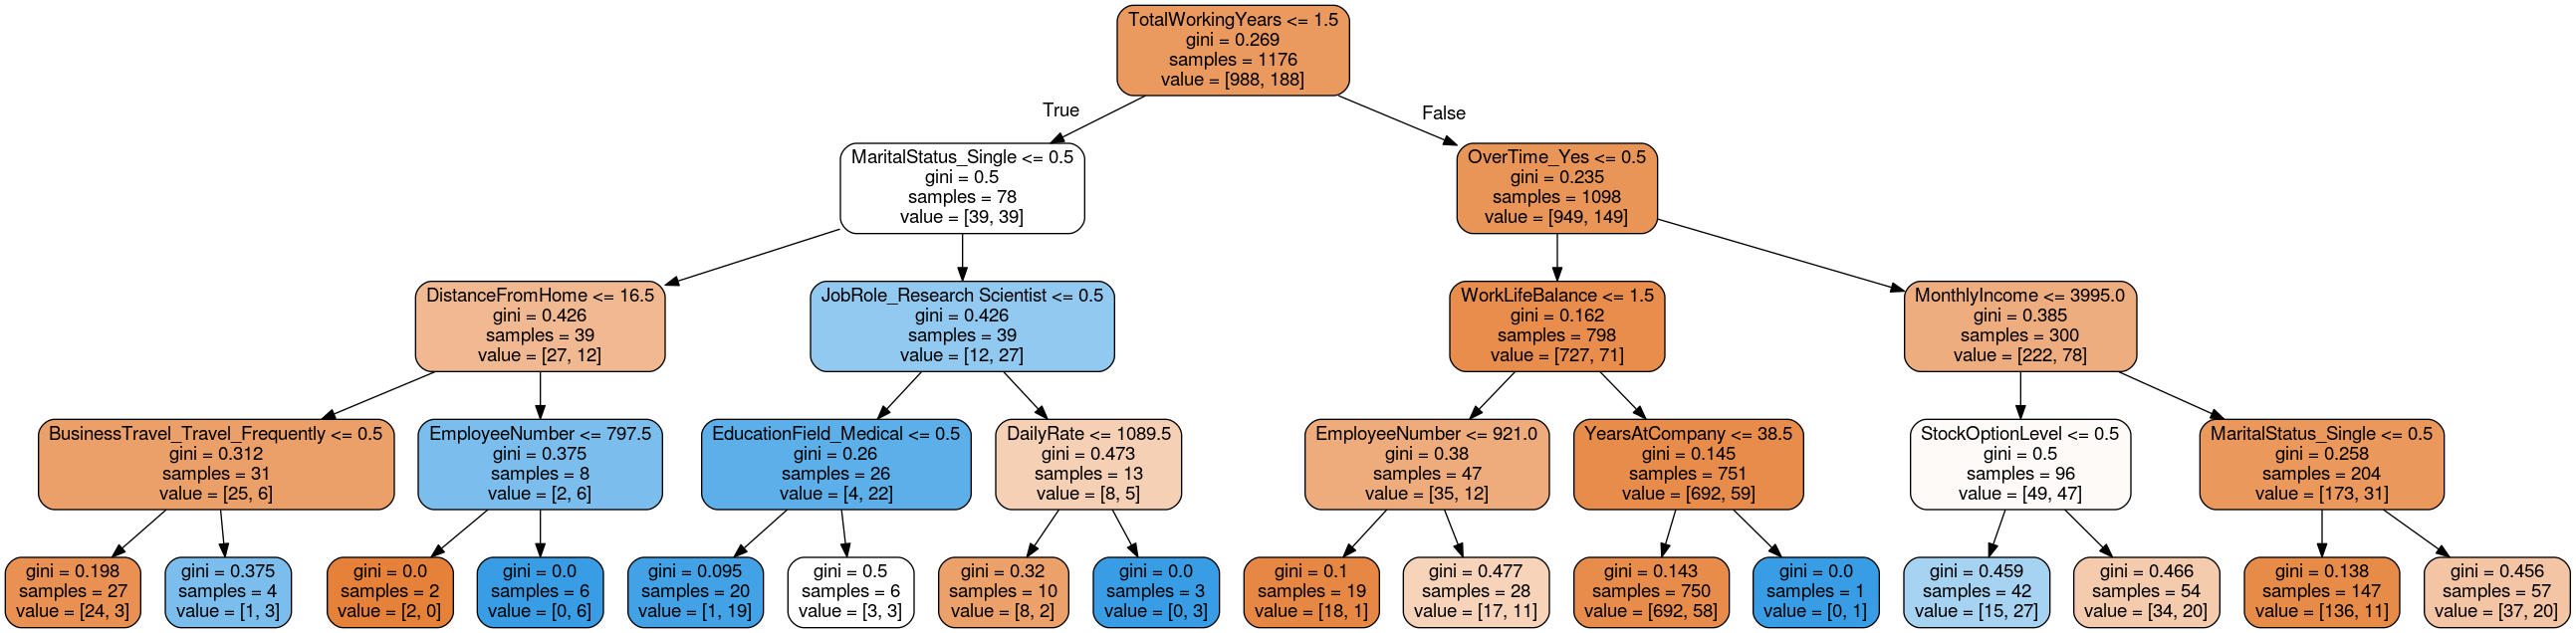

In [208]:
features = list(df_final.columns.values)

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


In [210]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [211]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(test)

In [212]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       245
           1       0.65      0.31      0.42        49

    accuracy                           0.86       294
   macro avg       0.76      0.64      0.67       294
weighted avg       0.84      0.86      0.83       294



In [227]:
params ={
    'n_estimators': [1200,1300,1400,1500],
    'max_features': [0.5,0.6,0.7,0.8,0.9],
    'learning_rate' : [0.2,0.25,0.3],
    'max_depth': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_features' : ['auto','sqrt']
}

In [228]:
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = params, n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)

In [238]:
fit2= gb_random.fit(smote_train, smote_target)

In [239]:
gb_random.best_params_

{'n_estimators': 1300,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 4,
 'learning_rate': 0.3}

In [241]:
pred = gb_random.predict(test)

In [242]:
print(accuracy_score(target_val, pred))
print(classification_report(target_val, pred))

0.8809523809523809
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.77      0.41      0.53        49

    accuracy                           0.88       294
   macro avg       0.83      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294



In [246]:
gb.feature_importances_

array([2.06192975e-02, 9.95631688e-03, 7.94836235e-03, 9.76908018e-03,
       1.39222415e-02, 4.24696124e-02, 8.33680809e-03, 1.52270745e-02,
       1.50491805e-02, 6.16440341e-02, 9.29441558e-02, 1.78990764e-02,
       1.08641541e-02, 5.04177379e-03, 1.57678171e-04, 1.87858480e-02,
       2.52425692e-02, 2.93140422e-02, 6.69368974e-03, 2.76672535e-02,
       1.11951352e-02, 1.83809835e-02, 5.83612235e-03, 1.64807577e-02,
       2.06518876e-02, 1.24062897e-03, 2.53379748e-02, 1.86104964e-03,
       3.11665129e-02, 8.60683148e-03, 1.12267152e-04, 3.49943997e-02,
       2.77896166e-03, 6.93343228e-02, 2.84285018e-03, 3.46739783e-03,
       2.30074820e-02, 5.75115897e-03, 1.98989296e-03, 2.89793961e-03,
       2.59099064e-03, 4.27924607e-03, 9.01563720e-03, 1.72470631e-03,
       1.00132624e-02, 5.58898169e-03, 1.59050751e-03, 2.42128199e-02,
       9.77527068e-03, 7.35148190e-03, 0.00000000e+00, 1.78436382e-01,
       1.79339080e-02])

In [247]:
trace = go.Scatter(y=gb.feature_importances_, x=df_final.columns.values, 
                   mode='markers',
                   marker=dict(sizemode = 'diameter',
                               sizeref = 1,
                               size = 13,
                               color = gb.feature_importances_,
                               colorscale='Portland',
                               showscale=True),
                   text = df_final.columns.values), 

data=trace

layout = go.Layout(autosize=True, title="Feature Importance", hovermode='closest',
                   yaxis_title="Feature Importance", height=800, width=1100, showlegend=False,
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   xaxis= dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,),
                   yaxis = dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,))



fig = go.Figure(data=data, layout=layout)
fig.show()